In [38]:
# 12.6 word frequency bar chart and word cloud from shakespear's hamlet

# import and download required stuff
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [39]:
# import hamlet text

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

In [40]:
# we load the text of hamlet into a textblox object
from textblob import TextBlob

blob = TextBlob(data)

In [41]:
# we do some preprocesing on the text to remove stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

In [42]:
# now we want to sort the words by frequency
from operator import itemgetter
sortedItems = sorted(items,key=itemgetter(1),reverse=True)

In [43]:
# and we can get the top 20 words by taking a slice of the sorted items list
top20Words = sortedItems[0:20]

In [44]:
# to be able to view a bar graph of the top 20 words, we want to load them into a DataFrame object
import pandas as pd

topWorddf = pd.DataFrame(top20Words,columns=['word','count'])

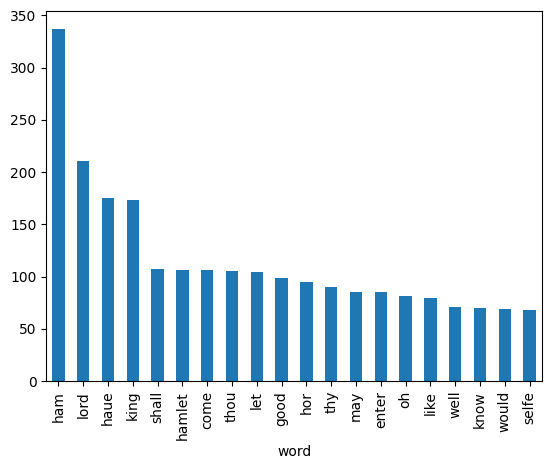

In [45]:
# and we can display a bar graph of word frequency using DataFrame's plot.bar method
axes = topWorddf.plot.bar(x='word',y='count',legend=False)

In [46]:
# now we move onto the word cloud
# start by getting a mask image

import imageio

imageFile="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
maskImage =imageio.v3.imread(imageFile)

In [47]:
# prepare the wordcloud object
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='prism',mask=maskImage,background_color='white')

In [48]:
# generate the wordcloud
wordcloud = wordcloud.generate(data)

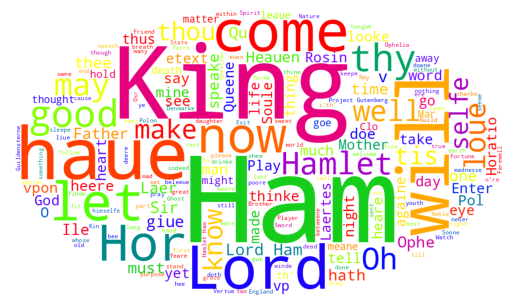

In [49]:
# we can now view the generated wordcloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()